# Lecture 17 – Data 100, Fall 2023

Data 100, Fall 2023

[Acknowledgments Page](https://ds100.org/fa23/acks/)

In [1]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.style.use('fivethirtyeight')
sns.set_context("talk")
sns.set_theme()
adjust_fontsize(size=20)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(5)

# Load the fuel dataset, and drop any rows that have missing data
vehicle_data = sns.load_dataset('mpg').dropna()
vehicle_data  = vehicle_data.rename(columns={"horsepower": "hp"})

In [3]:
# Building a complex dataset of first order and second order features

poly_transform = PolynomialFeatures(degree=2, include_bias=False)
vehicle_data_with_squared_features = \
             pd.DataFrame(poly_transform.fit_transform(vehicle_data[["hp", "weight", "displacement"]]),
             columns = poly_transform.get_feature_names_out())

In [4]:
vehicle_data_with_squared_features

,hp,weight,displacement,hp^2,hp weight,hp displacement,weight^2,weight displacement,displacement^2
0,130.0,3504.0,307.0,16900.0,455520.0,39910.0,12278016.0,1075728.0,94249.0
1,165.0,3693.0,350.0,27225.0,609345.0,57750.0,13638249.0,1292550.0,122500.0
2,150.0,3436.0,318.0,22500.0,515400.0,47700.0,11806096.0,1092648.0,101124.0
3,150.0,3433.0,304.0,22500.0,514950.0,45600.0,11785489.0,1043632.0,92416.0
4,140.0,3449.0,302.0,19600.0,482860.0,42280.0,11895601.0,1041598.0,91204.0
...,...,...,...,...,...,...,...,...,...
387,86.0,2790.0,140.0,7396.0,239940.0,12040.0,7784100.0,390600.0,19600.0
388,52.0,2130.0,97.0,2704.0,110760.0,5044.0,4536900.0,206610.0,9409.0
389,84.0,2295.0,135.0,7056.0,192780.0,11340.0,5267025.0,309825.0,18225.0
390,79.0,2625.0,120.0,6241.0,207375.0,9480.0,6890625.0,315000.0,14400.0


In [5]:
# Fitting a regression model with L2 regularization
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10**-5)
ridge_model.fit(vehicle_data_with_squared_features, vehicle_data["mpg"])

Ridge(alpha=1e-05)

In [6]:
ridge_model.coef_

array([-1.35872588e-01, -1.46864458e-04, -1.18230336e-01, -4.03590098e-04,
       -1.12862371e-05,  8.25179864e-04, -1.17645881e-06,  2.69757832e-05,
       -1.72888463e-04])

In [7]:
ridge_model = Ridge(alpha=10000)
ridge_model.fit(vehicle_data_with_squared_features, vehicle_data["mpg"])

Ridge(alpha=10000)

In [8]:
ridge_model.coef_

array([-5.56414449e-02, -7.93804083e-03, -8.22081425e-02, -6.18785466e-04,
       -2.55492157e-05,  9.47353944e-04,  7.58061062e-07,  1.07439477e-05,
       -1.64344898e-04])

In [9]:
# Fitting a regression model without regularization
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(vehicle_data_with_squared_features, vehicle_data["mpg"])

LinearRegression()

In [10]:
linear_model.coef_

array([-1.35872588e-01, -1.46864447e-04, -1.18230336e-01, -4.03590097e-04,
       -1.12862370e-05,  8.25179863e-04, -1.17645882e-06,  2.69757832e-05,
       -1.72888463e-04])

In [11]:
# Fitting a regression model with L1 regularization
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 10)
lasso_model.fit(vehicle_data_with_squared_features, vehicle_data["mpg"])

Lasso(alpha=10)

In [12]:
lasso_model.coef_

array([-0.00000000e+00, -1.88104942e-02, -0.00000000e+00, -1.19625308e-03,
        8.84657720e-06,  8.77253835e-04,  3.16759194e-06, -3.21738391e-05,
       -1.29386937e-05])

### Scaling the Data

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
rescaled_df = pd.DataFrame(ss.fit_transform(vehicle_data_with_squared_features),
                           columns = ss.get_feature_names_out())

In [14]:
rescaled_df

,hp,weight,displacement,hp^2,hp weight,hp displacement,weight^2,weight displacement,displacement^2
0,0.664133,0.620540,1.077290,0.459979,0.528582,0.738743,0.492385,0.791843,0.926137
1,1.574594,0.843334,1.488732,1.513418,1.227955,1.562694,0.741147,1.206419,1.500790
2,1.184397,0.540382,1.182542,1.031336,0.800830,1.098529,0.406079,0.824195,1.065981
3,1.184397,0.536845,1.048584,1.031336,0.798784,1.001539,0.402311,0.730474,0.888852
4,0.924265,0.555706,1.029447,0.735454,0.652885,0.848203,0.422448,0.726585,0.864198
...,...,...,...,...,...,...,...,...,...
387,-0.480448,-0.221125,-0.520637,-0.509696,-0.451563,-0.548450,-0.329472,-0.518158,-0.592298
388,-1.364896,-0.999134,-0.932079,-0.988411,-1.038886,-0.871565,-0.923326,-0.869957,-0.799593
389,-0.532474,-0.804632,-0.568479,-0.544385,-0.665978,-0.580780,-0.789800,-0.672604,-0.620267
390,-0.662540,-0.415627,-0.712005,-0.627538,-0.599621,-0.666685,-0.492872,-0.662710,-0.698072


In [15]:
ridge_model = Ridge(alpha=10000)
ridge_model.fit(rescaled_df, vehicle_data["mpg"])
ridge_model.coef_

array([-0.1792743 , -0.19610513, -0.18648617, -0.1601219 , -0.18015125,
       -0.16858023, -0.18779478, -0.18176294, -0.17021841])

Plotting helper functions.

In [16]:
# Helper functions to plot and 
# Compute expectation, variance, standard deviation
def plot_dist(dist_df,
                      xname="x", pname="P(X = x)", varname="X",
                      save=False):
    """
    Plot a distribution from a distribution table.
    Single-variate.
    """
    plt.bar(dist_df[xname], dist_df[pname])
    plt.ylabel(pname)
    plt.xlabel(xname)
    plt.title(f"Distribution of ${varname}$")
    plt.xticks(sorted(dist_df[xname].unique()))
    if save:
        fig = plt.gcf()
        fig.patch.set_alpha(0.0)
        plt.savefig(f"dist{varname}.png", bbox_inches = 'tight');


def simulate_samples(df, xname="x", pname="P(X = x)", size=1):
    return np.random.choice(
                df[xname], # Draw from these choiecs
                size=size, # This many times
                p=df[pname]) # According to this distribution

def simulate_iid_df(dist_df, nvars, rows, varname="X"):
    """
    Make an (row x nvars) dataframe
    by calling simulate_samples for each of the nvars per row
    """
    sample_dict = {}
    for i in range(nvars):
        # Generate many datapoints 
        sample_dict[f"{varname}_{i+1}"] = \
            simulate_samples(dist_df, size=rows)
    return pd.DataFrame(sample_dict)


def plot_simulated_dist(df, colname, show_stats=True, save=False, **kwargs):
    """
    Plot a simulated population.
    """
    sns.histplot(data=df, x=colname, stat='probability', discrete=True, **kwargs)
    plt.xticks(sorted(df[colname].unique())) # if there are gaps)
    if show_stats:
        display(stats_df_multi(df, [colname]))
    if save:
        fig = plt.gcf()
        fig.patch.set_alpha(0.0)
        plt.savefig(f"sim{colname}.png", bbox_inches = 'tight');

def stats_df_multi(df, colnames):
    means = df[colnames].mean(axis=0)
    variances = df[colnames].var(axis=0)
    stdevs = df[colnames].std(axis=0)
    df_stats = pd.concat([means, variances, stdevs],axis=1).T
    df_stats['index_col'] = ["E[•]", "Var(•)", "SD(•)"]
    df_stats = df_stats.set_index('index_col', drop=True).rename_axis(None)
    return df_stats

def plot_simulated_dist_multi(df, colnames, show_stats=True):
    """
    If multiple columns provided, use separate plots.
    """
    ncols = 1
    nrows = len(colnames)
    plt.figure(figsize=(6, 2*nrows+2))
    
    for i, colname in enumerate(colnames):
        subplot_int = int(100*int(nrows) + 10*int(ncols) + int(i+1))
        plt.subplot(subplot_int)
        plot_simulated_dist(df, colname, show_stats=False)
    plt.tight_layout()
    if show_stats:
        display(stats_df_multi(df, colnames))

---

## A Random Variable $X$

Our probability distribution of $X$, shown as a table:

In [17]:
# Our random variable X
dist_df = pd.DataFrame({"x": [3, 4, 6, 8],
                        "P(X = x)": [0.1, 0.2, 0.4, 0.3]})
dist_df

,x,P(X = x)
0,3,0.1
1,4,0.2
2,6,0.4
3,8,0.3


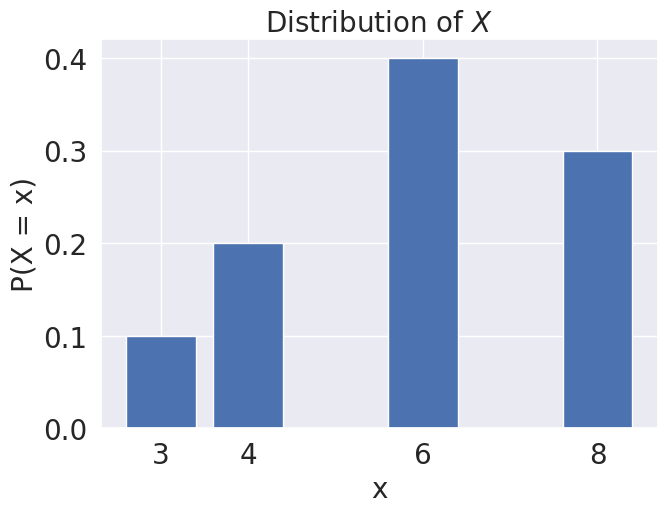

In [18]:
plot_dist(dist_df, save=True)

Let's use this probability distribution to generate a table of $X(s)$, i.e., random variable values for many many samples.

In [19]:
# copied from above
# def simulate_samples(df, xname="x", pname="P(X = x)", size=1):
#     return np.random.choice(
#                 df[xname], # draw from these choiecs
#                 size=size, # this many times
#                 p=df[pname]) # according to this distribution

N = 80000
all_samples = simulate_samples(dist_df, size=N)
sim_df = pd.DataFrame({"X(s)": all_samples})
sim_df

,X(s)
0,3
1,8
2,6
3,8
4,3
...,...
79995,6
79996,6
79997,6
79998,3


<br/><br/>
Let's check how well this simulated sample matches our probability distribution!

,X(s)
E[•],5.895200
Var(•),2.892903
SD(•),1.700854


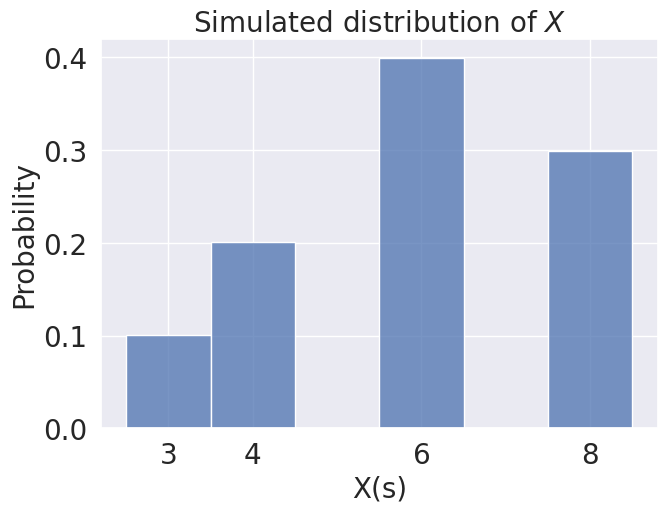

In [20]:
plot_simulated_dist(sim_df, "X(s)")
plt.title("Simulated distribution of $X$")
plt.show()

In [21]:
# The tabular view of the above plot
sim_df.value_counts("X(s)").sort_values()/N

X(s)
3    0.100250
4    0.201212
8    0.299187
6    0.399350
dtype: float64

<br/><br/>

---

# Die Is the Singular; Dice Is the Plural

Let X be the outcome of a single die roll. X is a random variable.

In [22]:
# Our random variable X
roll_df = pd.DataFrame({"x": [1, 2, 3, 4, 5, 6],
                        "P(X = x)": np.ones(6)/6})
roll_df

,x,P(X = x)
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


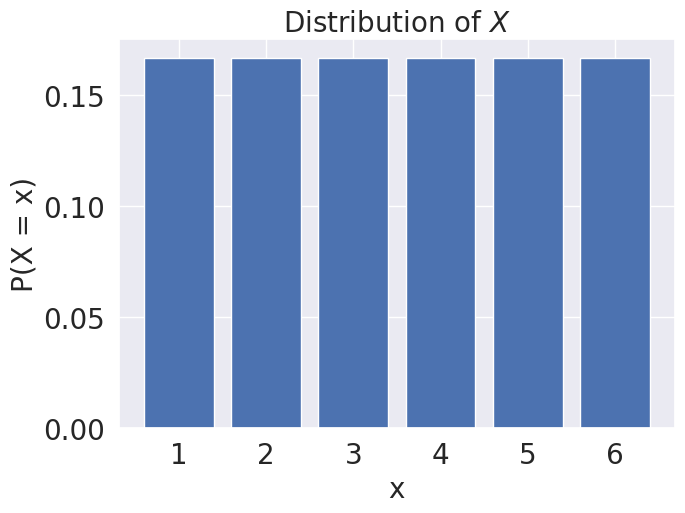

In [23]:
plot_dist(roll_df)

<br/><br/>

---

# Sum of 2 Dice Rolls

Here's the distribution of a single die roll:

In [24]:
roll_df = pd.DataFrame({"x": [1, 2, 3, 4, 5, 6],
                        "P(X = x)": np.ones(6)/6})
roll_df

,x,P(X = x)
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


Let $X_1, X_2$ are the outcomes of two dice rolls. Note $X_1$ and $X_2$ are i.i.d. (independent and identically distributed).

Below I call a helper function `simulate_iid_df`, which simulates an 80,000-row table of $X_1, X_2$ values. It uses `np.random.choice(arr, size, p)` [link](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) where `arr` is the array the values and `p` is the probability associated with choosing each value. If you're interested in the implementation details, scroll up.

In [25]:
N = 80000
sim_rolls_df = simulate_iid_df(roll_df, nvars=2, rows=N)
sim_rolls_df

,X_1,X_2
0,3,6
1,3,3
2,2,5
3,5,2
4,5,5
...,...,...
79995,5,6
79996,6,2
79997,2,1
79998,5,5


Define the following random variables, which are functions of $X_1$ and $X_2$:
* $Y = X_1 + X_1 = 2 X_1$
* $Z = X_1 + X_2$

We can use our simulated values of $X_1, X_2$ to create new columns $Y$ and $Z$:

In [26]:
sim_rolls_df['Y'] = 2 * sim_rolls_df['X_1']
sim_rolls_df['Z'] = sim_rolls_df['X_1'] + sim_rolls_df['X_2']
sim_rolls_df

,X_1,X_2,Y,Z
0,3,6,6,9
1,3,3,6,6
2,2,5,4,7
3,5,2,10,7
4,5,5,10,10
...,...,...,...,...
79995,5,6,10,11
79996,6,2,12,8
79997,2,1,4,3
79998,5,5,10,10


Now that we have simulated samples of $Y$ and $Z$, we can plot histograms to see their distributions!

<br/>
Distribution of $Y$, which was twice the value of our first die roll:

,Y
E[•],7.019100
Var(•),11.644181
SD(•),3.412357


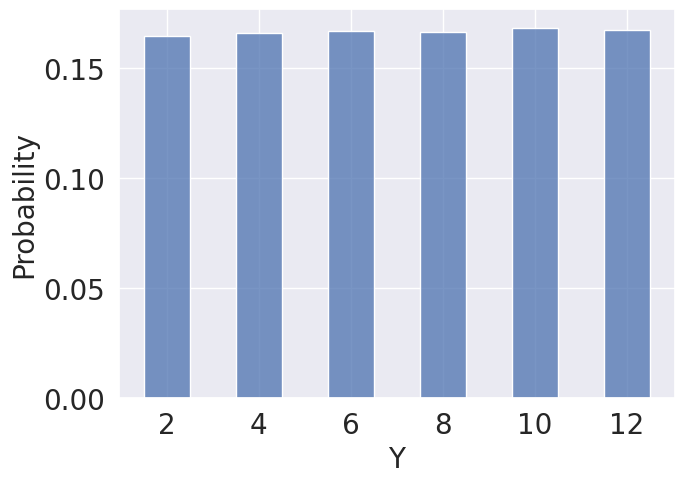

In [27]:
plot_simulated_dist(sim_rolls_df, "Y", save=True)

Distribution of $Z$, the sum of two IID dice rolls:

,Z
E[•],7.004613
Var(•),5.833214
SD(•),2.415205


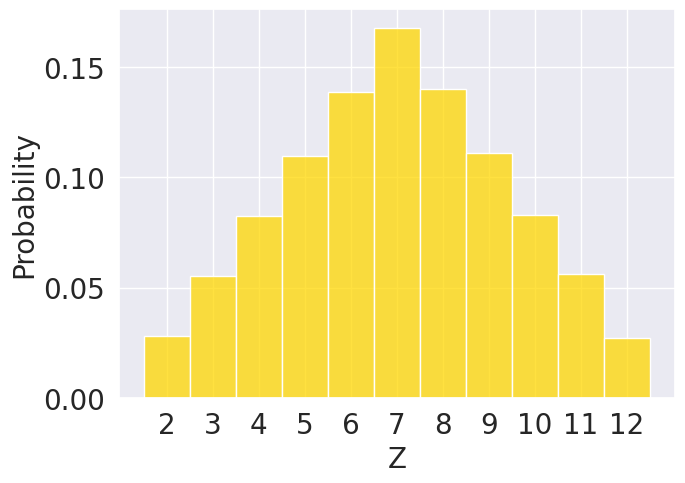

In [28]:
plot_simulated_dist(sim_rolls_df, "Z", save=True, color='gold')

Let's compare the expectations and variances of these simulated distributions of $Y$ and $Z$.
* We computed:
    * $\mathbb{E}[Y]$ as `np.mean(sim_rolls_df['Y'])`
    * $\text{Var}(Y)$ as `np.var(sim_rolls_df['Y']`
    * etc.
* The larger your simulated rows $N$, the closer the simulated expectation will be to the true expectation.
* Our approach is tedious--we have to simulate an entire population, then reduce it down to expectation/variance/standard deviation. There has to be a better way!

In [29]:
stats_df_multi(sim_rolls_df, ["Y", "Z"])

,Y,Z
E[•],7.019100,7.004613
Var(•),11.644181,5.833214
SD(•),3.412357,2.415205


<br/><br/>

---

# Which would you pick?

* $\large Y_A = 10 X_1 + 10 X_2 $
* $\large Y_B = \sum\limits_{i=1}^{20} X_i$
* $\large Y_C = 20 X_1$

First let's construct the probability distribution for a single coin. This will let us flip 20 IID coins later.

In [30]:
# First construct probability distribution for a single fair coin
p = 0.5
coin_df = pd.DataFrame({"x": [0, 1], # [Tails, Heads]
                        "P(X = x)": [p, 1 - p]})
coin_df

,x,P(X = x)
0,0,0.5
1,1,0.5


## Choice A:
$\large Y_A = 10 X_1 + 10 X_2 $

In [31]:
# Flip 20 iid coins, each exactly once
flips20_df = simulate_iid_df(coin_df, nvars=20, rows=1)

# Construct Y_A from this sample
flips20_df["Y_A"] = 10*flips20_df["X_1"] + 10*flips20_df["X_2"]

print("Sample of size 1:")
display(flips20_df)
print("Y_A:", flips20_df.loc[0,"Y_A"])

Sample of size 1:


,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,Y_A
0,1,0,1,0,0,1,0,0,1,0,...,0,1,1,1,1,1,0,1,0,10


Y_A: 10


## Choice B:

$\large Y_B = \sum\limits_{i=1}^{20} X_i$

In [32]:
# Flip 20 iid coins, each exactly once
flips20_df = simulate_iid_df(coin_df, nvars=20, rows=1)

# Construct Y_B from this sample
flips20_df["Y_B"] = flips20_df.sum(axis=1) # sum all coins

display(flips20_df)
print("Y_B:", flips20_df.loc[0,"Y_B"])

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,Y_B
0,0,0,0,1,1,0,1,0,1,1,...,0,1,0,0,0,1,0,1,0,9


Y_B: 9


## Choice C:

$\large Y_C = 20 X_1$

In [33]:
# Flip 20 iid coins, each exactly once
flips20_df = simulate_iid_df(coin_df, nvars=20, rows=1)

# Construct Y_C from this sample
flips20_df["Y_C"] = 20*flips20_df["X_1"]

display(flips20_df[["X_1", "Y_C"]])
print("Y_C:", flips20_df.loc[0,"Y_C"])

,X_1,Y_C
0,0,0


Y_C: 0


<br/>
If you're curious as to what these distributions look like, I've simulated some populations:

80000 simulated samples


,Y_A,Y_B,Y_C
E[•],10.000375,10.007825,12.490625
Var(•),50.359379,5.005526,56.250615
SD(•),7.096434,2.237303,7.500041


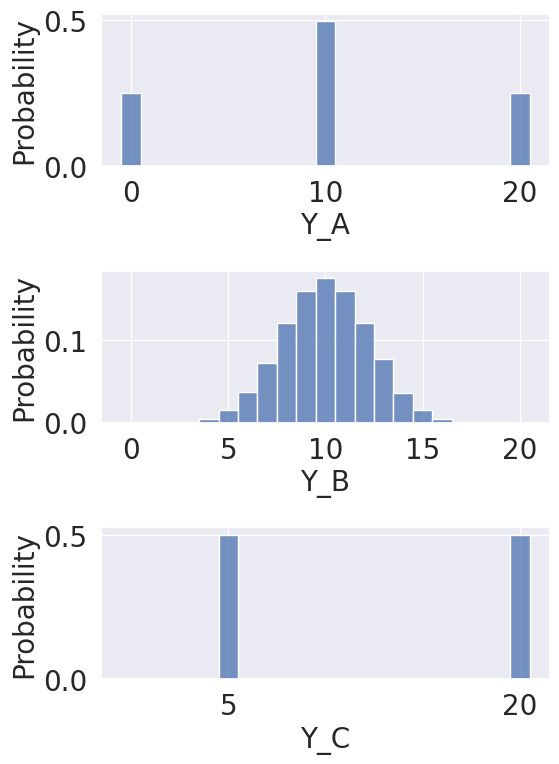

In [34]:
# Simulate one big population of 20 fair flips, N = 80,000
N = 80000
df_coins = simulate_iid_df(coin_df, nvars=20, rows=N)
print(f"{N} simulated samples")


# construct Y_A, Y_B, Y_C from this population
df_coins["Y_A"] = 10*df_coins["X_1"] + 10*df_coins["X_2"]
df_coins["Y_B"] = df_coins.loc[:,"X_1":"X_20"].sum(axis=1)
df_coins["Y_C"] = 5 + 15*df_coins["X_1"]
plot_simulated_dist_multi(df_coins, ["Y_A", "Y_B", "Y_C"])

# adjust axes for nicer plotting
axs = plt.gcf().axes
axs[1].set_xlim(axs[0].get_xlim())    # Y_B
axs[1].set_xticks([0, 5, 10, 15, 20]) # Y_B
axs[2].set_xlim(axs[0].get_xlim())    # Y_C
plt.show()

<br/><br/>

If we flipped 100 coins, look how beautiful the Binomial distribution looks:

,Y_100
E[•],25.020512
Var(•),12.470673
SD(•),3.531384


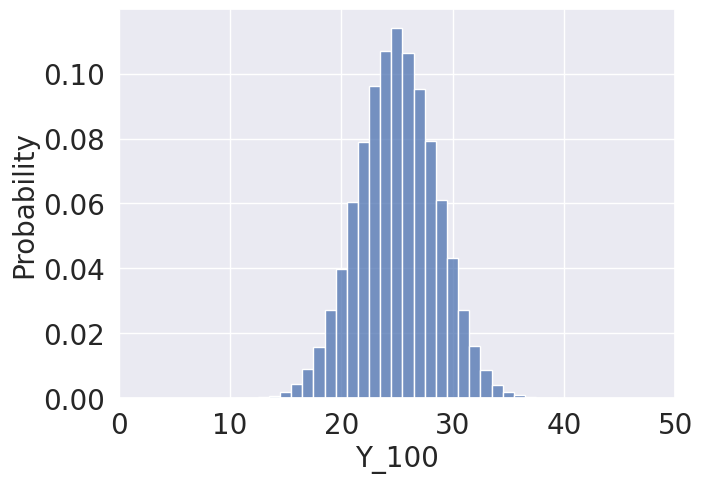

In [35]:
# Simulate one big population of 100 fair flips, N = 80,000
N = 80000
df_coins = simulate_iid_df(coin_df, nvars=50, rows=N)
df_coins["Y_100"] = df_coins.loc[:,"X_1":"X_50"].sum(axis=1)
plot_simulated_dist(df_coins, "Y_100")
plt.xticks([0, 10, 20, 30, 40, 50])
plt.show()

<br/><br/><br/>

---

# From Population to Sample

Remember the population distribution we looked at earlier:

In [36]:
dist_df

,x,P(X = x)
0,3,0.1
1,4,0.2
2,6,0.4
3,8,0.3


In [37]:
# A population generated from the distribution
N = 100000
all_samples = simulate_samples(dist_df, size=N)
sim_pop_df = pd.DataFrame({"X(s)": all_samples})
sim_pop_df

,X(s)
0,6
1,3
2,8
3,4
4,4
...,...
99995,4
99996,6
99997,3
99998,6


<br/><br/><br/>
Suppose we draw a sample of size 100 from this giant population.

We are performing **Random Sampling with Replacement:** `df.sample(n, replace=True)` ([link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html))

In [38]:
n = 100      # Size of our sample
sample_df = (
             sim_pop_df.sample(n, replace=True)
             
             # Some reformatting below
             .reset_index(drop=True)
             .rename(columns={"X(s)": "X"})
            )
sample_df

,X
0,4
1,4
2,8
3,6
4,4
...,...
95,4
96,4
97,3
98,8


Our **sample distribution** (n = 100):

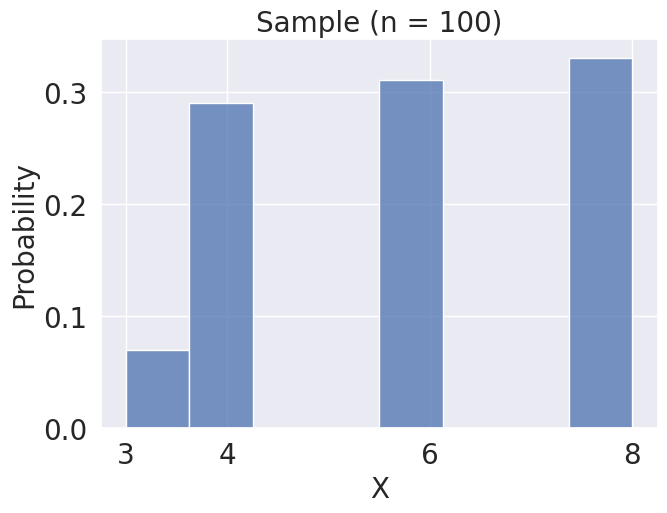

Mean of Sample: 5.87


In [39]:
sns.histplot(data=sample_df, x='X', stat='probability')
plt.xticks([3, 4, 6, 8])
plt.title(f"Sample (n = 100)")
plt.show()

print("Mean of Sample:", np.mean(sample_df['X']))

<br/>

Compare this to our **original population** (N = 80,000):

,X(s)
E[•],5.895200
Var(•),2.892903
SD(•),1.700854


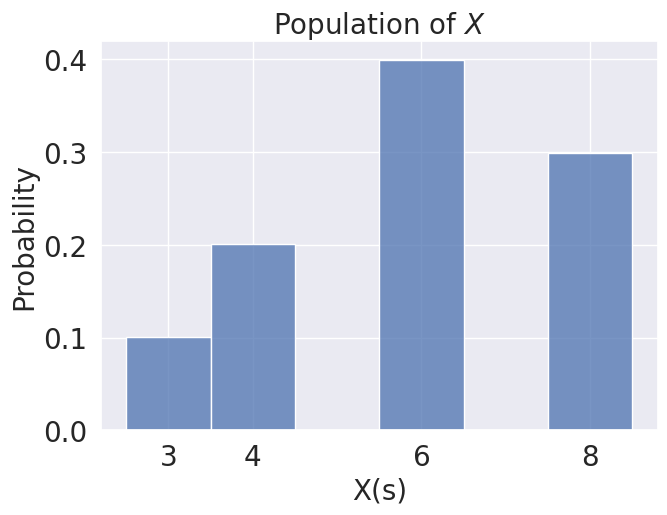

In [40]:
plot_simulated_dist(sim_df, "X(s)")
plt.title("Population of $X$")
plt.show()